**Problem Statement:**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company wants insights when to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. So we have to buidling L1 L2 model to predict price.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

We have to find the optimal value of lambda for ridge and lasso regression.

**Business Goal:**
We have to model the price of houses with the available independent variables. This model will then be used by the Company to understand how exactly the prices vary with the variables. 

## Step1: Data Sourcing

**Import Required Libraries**

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [340]:
# Load data
df=pd.read_csv('US_Housing.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [341]:
df.shape

(1460, 81)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [343]:
# Cout of data types
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [344]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step2: Data Cleansing

**MSSubClass**

As per data dictionary, the column `MSSubClass` has categorical values with interger data type. Therefore, change the datatype to object

In [345]:
# Change the data type from Integer to object
df['MSSubClass']=df['MSSubClass'].astype('object')

**Numerical columns with value 0**

There are few numerical columns with value 0 which can be replaced with null value

In [346]:
#List of columns with value 0
zero_cols=df.columns[df.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [347]:
# Replace 0 with null value
df[zero_cols]=df[zero_cols].replace(0,np.NaN )

## Step3: Missing Value Treatment

In [348]:
#Percentage of missing values
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False)

PoolQC           99.52
PoolArea         99.52
3SsnPorch        98.36
LowQualFinSF     98.22
MiscVal          96.44
MiscFeature      96.30
BsmtHalfBath     94.38
Alley            93.77
ScreenPorch      92.05
BsmtFinSF2       88.56
EnclosedPorch    85.75
Fence            80.75
HalfBath         62.53
MasVnrType       59.73
MasVnrArea       59.52
BsmtFullBath     58.63
2ndFlrSF         56.78
WoodDeckSF       52.12
FireplaceQu      47.26
Fireplaces       47.26
OpenPorchSF      44.93
BsmtFinSF1       31.99
LotFrontage      17.74
BsmtUnfSF         8.08
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        5.55
GarageArea        5.55
GarageQual        5.55
GarageCond        5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
TotalBsmtSF       2.53
BsmtFinType1      2.53
BsmtCond          2.53
FullBath          0.62
BedroomAbvGr      0.41
KitchenAbvGr      0.07
Electrical        0.07
dtype: float64

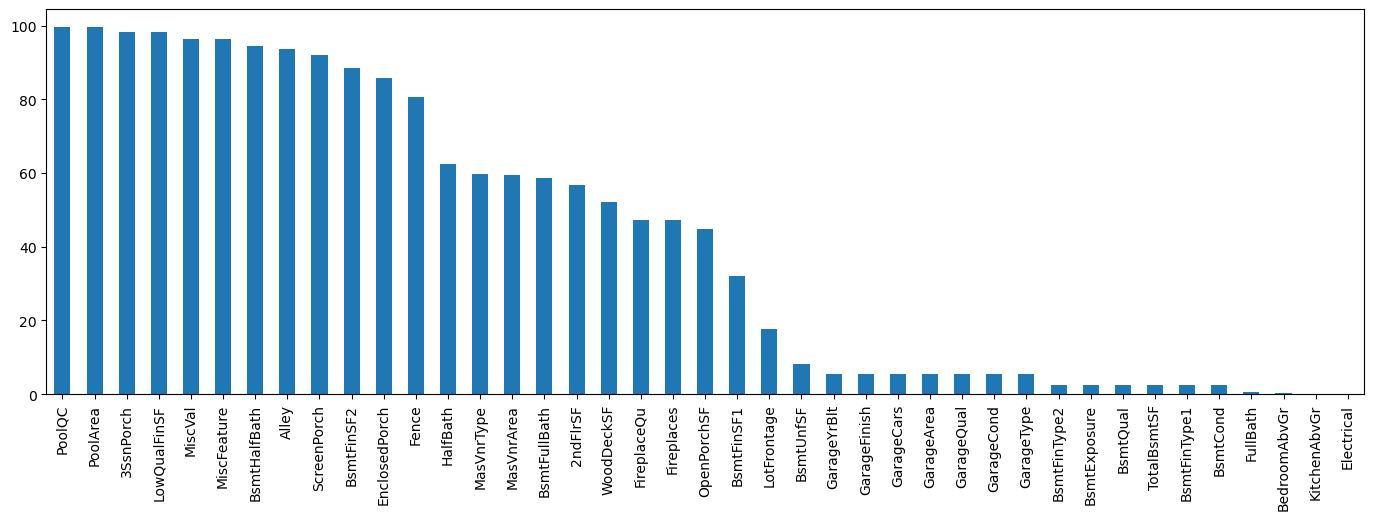

In [349]:
# Barplot for Percentages of missing values
plt.figure(figsize=[17,5])
round((df[df.columns[df.isnull().any()]].isnull().sum()/len(df))*100,2).sort_values(ascending=False).plot.bar()
plt.show()

**Observations:**
- There are few columns with missing values more than 30%. Therefore, drop null values by columns.
- `LotFrontage` null values can be imputed with median.
- `Garage` columns has same percentage of missing values. Therefore, drop null values by rows.
- `Basement` columns has same percentage of missing values. Therefore, drop null values by rows.
- `Masonry`  columns has same percentage of missing values. Therefore, drop null values by rows.

**Drop columns having missing values >30%**

In [350]:
# List of columns with missing values >30%
miss_cols=df.columns[(df.isnull().sum()/len(df)*100>30)]
miss_cols

Index(['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
       'Fireplaces', 'FireplaceQu', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal'],
      dtype='object')

In [351]:
#Drop columns with missing values >40%
df.drop(miss_cols,axis=1, inplace=True)
df.shape

(1460, 59)

**LotFrontage**

In [352]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

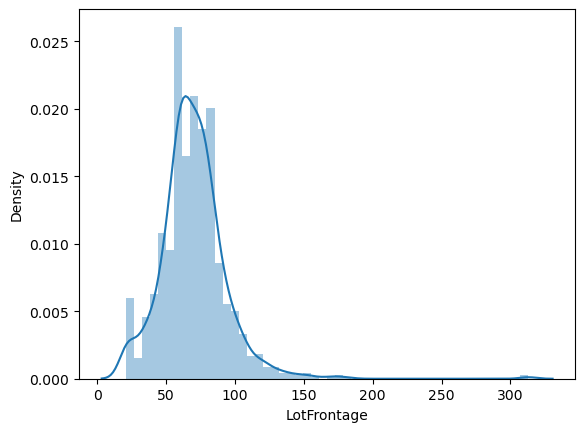

In [353]:
# Plot distribution
sns.distplot(df['LotFrontage'])
plt.show()

In [354]:
#Impute LotFrontage missing values with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

**Garage Columns**

In [355]:
garage_cols=['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']
garage_cols

['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [356]:
df[df['GarageYrBlt'].isnull()][garage_cols]

,GarageYrBlt,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [357]:
# Drop null values by rows
df.dropna(subset=garage_cols, inplace=True)

In [358]:
df.shape

(1379, 59)

**Basement Columns**

In [359]:
df.columns[df.isnull().any()]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'FullBath', 'BedroomAbvGr'],
      dtype='object')

In [360]:
basement_cols=['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2','BsmtUnfSF']
basement_cols

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtUnfSF']

In [361]:
# Drop null values by rows
df.dropna(subset=basement_cols, inplace=True)

In [362]:
df.shape

(1274, 59)

**Other columns**

In [363]:
other_cols=df.columns[df.isnull().any()]
other_cols

Index(['Electrical', 'FullBath', 'BedroomAbvGr'], dtype='object')

In [364]:
# Drop null values by rows
df.dropna(subset=other_cols, inplace=True)

In [365]:
df.shape

(1268, 59)

In [366]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [367]:
#Verify missing value treatment
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond  

## Step3: Data Preparation

### Categorical Variables

**Drop Date, Year and Month columns as dataset may suffer high dimensionality problem if we create dummies of these columns**

In [368]:
date_cols=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']
date_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

In [369]:
# Drop year and month columns
df.drop(date_cols,axis=1, inplace=True)
df.shape

(1268, 54)

**Create dummies for categorical variables**

In [370]:
#Create a list of categorical variables
cat_cols=df.select_dtypes('object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [371]:
# New dataframe of dummies
df_dum=pd.get_dummies(df[cat_cols],drop_first=True)

In [372]:
df_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [373]:
df_dum.shape

(1268, 201)

**Concatenate dummies  data frame with original data frame**

In [374]:
df=pd.concat([df,df_dum], axis=1)
df.shape

(1268, 255)

In [375]:
# Drop original columns of categorical variables
df.drop(cat_cols, axis=1, inplace=True)
df.shape

(1268, 217)

In [376]:
# Drop id column as it is not a significant predictor
df.drop('Id', axis=1, inplace=True)
df.shape

(1268, 216)

### Split data frame into train and test sets

In [377]:
from sklearn.model_selection import train_test_split

In [378]:
#Split train and test sets
df_train, df_test=train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [379]:
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)

Train shape (887, 216)
Test shape (381, 216)


### Rescaling Numerical Variables

In [380]:
num_cols=df.select_dtypes(exclude='uint8').columns
num_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [381]:
from sklearn.preprocessing import MinMaxScaler

In [382]:
scaler=MinMaxScaler()

In [383]:
df_train[num_cols]=scaler.fit_transform(df_train[num_cols])
df_test[num_cols]=scaler.transform(df_test[num_cols])

In [384]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
919,0.226027,0.058253,0.428571,0.857143,0.099483,0.348627,0.339162,0.203848,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1210,0.167808,0.059411,0.428571,0.428571,0.448320,0.306947,0.208379,0.315913,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
487,0.167808,0.065694,0.285714,0.571429,0.203273,0.445557,0.364663,0.222049,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1302,0.243151,0.052681,0.714286,0.428571,0.177003,0.342488,0.262295,0.492980,0.5,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
171,0.410959,0.185394,0.428571,0.428571,0.183893,0.315024,0.427322,0.266771,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [385]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
842,0.208904,0.045938,0.428571,0.714286,0.112834,0.330210,0.248452,0.139106,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
465,0.164384,0.009477,0.571429,0.428571,0.586133,0.410339,0.339162,0.203848,0.5,0.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
118,0.236301,0.066510,0.571429,0.428571,0.081395,0.506624,0.442987,0.673947,1.0,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
724,0.222603,0.072088,0.857143,0.428571,0.193798,0.514701,0.442623,0.277691,0.5,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
116,0.164384,0.061851,0.285714,0.428571,0.102498,0.318901,0.221858,0.120125,0.0,0.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Divide train set into X and Y sets

In [386]:
y_train=df_train.pop('SalePrice')
x_train=df_train

In [387]:
print('y_train shape', y_train.shape)
print('x_train shape', x_train.shape)

y_train shape (887,)
x_train shape (887, 215)


In [388]:
y_test=df_test.pop('SalePrice')
x_test=df_test

In [389]:
print('y_test shape', y_test.shape)
print('x_test shape', x_test.shape)

y_test shape (381,)
x_test shape (381, 215)


### Model using Ridge Regression

In [390]:
from sklearn.linear_model import Ridge

In [391]:
#List of lambda values for iteration
lambdas=[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [392]:
for lam in lambdas:
    ridge=Ridge(alpha=lam)
    ridge.fit(x_train, y_train)
    y_train_pred=ridge.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9336980113046518
0.001 ------ 0.9368720541274327
0.01 ------ 0.9368373837979529
0.1 ------ 0.9357992370981498
1 ------ 0.9275081293163188
10 ------ 0.8992132357866864
100 ------ 0.7874158770312805
1000 ------ 0.4915847927672794


In [393]:
ridge=Ridge(alpha=0.01)
ridge.fit(x_train, y_train)

Ridge(alpha=0.01)

In [394]:
y_train_pred=ridge.predict(x_train)

**Model Evaluation on train set**

In [395]:
r2_score(y_train, y_train_pred)

0.9368373837979529

In [396]:
mean_squared_error(y_train, y_train_pred)

0.0008595813781309892

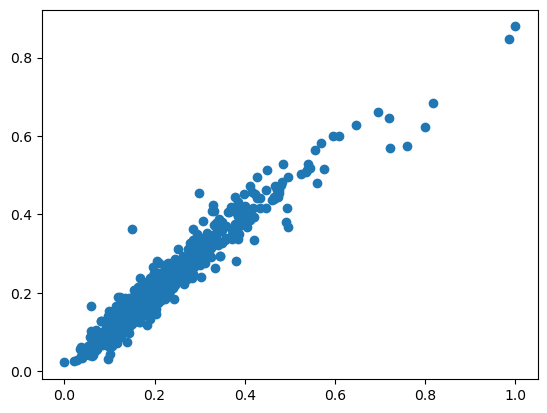

In [397]:
plt.scatter(y_train, y_train_pred)
plt.show()

**Model Evaluation on test set**

In [398]:
y_test_pred=ridge.predict(x_test)

In [399]:
r2_score(y_test, y_test_pred)

0.4669365051856169

In [400]:
mean_squared_error(y_test, y_test_pred)

0.005164435311987474

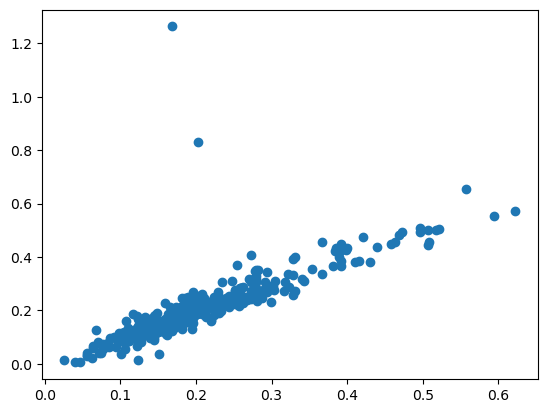

In [401]:
plt.scatter(y_test, y_test_pred)
plt.show()

### Model using Lasso Regression

In [402]:
from sklearn.linear_model import Lasso

In [403]:
for lam in lambdas:
    lasso=Lasso(alpha=lam)
    lasso.fit(x_train, y_train)
    y_train_pred=lasso.predict(x_train)
    print(lam,'------',r2_score(y_train, y_train_pred))

0 ------ 0.9368717011192766
0.001 ------ 0.8633108574137824
0.01 ------ 0.41583186793836036
0.1 ------ 0.0
1 ------ 0.0
10 ------ 0.0
100 ------ 0.0
1000 ------ 0.0


In [404]:
lasso=Lasso(alpha=0)
lasso.fit(x_train, y_train)

Lasso(alpha=0)

In [405]:
y_train_pred=lasso.predict(x_train)

**Model Evaluation on train set**

In [406]:
r2_score(y_train, y_train_pred)

0.9368717011192766

In [407]:
mean_squared_error(y_test, y_test_pred)

0.005164435311987474

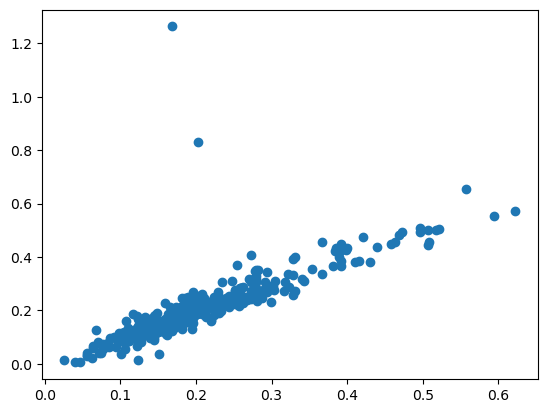

In [408]:
plt.scatter(y_test, y_test_pred)
plt.show()

**Model Evaluation on test set**

In [409]:
y_test_pred=lasso.predict(x_test)

In [410]:
r2_score(y_test, y_test_pred)

0.46802498144992266

In [411]:
mean_squared_error(y_test, y_test_pred)

0.005153889916719696

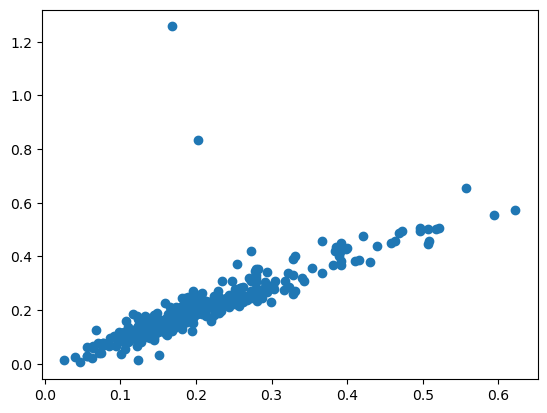

In [412]:
plt.scatter(y_test, y_test_pred)
plt.show()